# Visualizing Loans Awarded by Kiva

In this project you'll visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using Seaborn, you'll explore the average loan amount by country using aggregated bar charts. You'll also visualize the distribution of loan amounts by project type and gender using box plots and violin plots.

Some of the steps below will have  hints that you can access if you need them. Hints will look like this:
<br>
<br>
<details>
<summary>Hint (click me)</summary>
<br>
I'm a hint!
<br>
</details>

**A Note On `plt.show()`:** You may be used to displaying your plots using the code `plt.show()`. This IPython Jupyter notebook removes the necessity of calling `plt.show()` after each plot. You should be able to render your Seaborn plots simply by running the cell with the code for your plot. If you have issues rendering your plot you can try adding `plt.show()` to a cell.

## Step 1: Import Necessary Python Modules
Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import re

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('kiva/data-science-for-good-kiva-crowdfunding', unzip=True)

## Step 2: Ingest The Data
Load **kiva_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.
<br>
<br>
<details>
<summary>Hint</summary>
<br>
Use `pd.read_csv()`.
<br>
</details>

In [4]:
full_df = pd.read_csv("kiva_loans.csv")

In [5]:
print(full_df.head())

       id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                post

In [6]:
print(full_df.sector.unique())

['Food' 'Transportation' 'Arts' 'Services' 'Agriculture' 'Manufacturing'
 'Wholesale' 'Retail' 'Clothing' 'Construction' 'Health' 'Education'
 'Personal Use' 'Housing' 'Entertainment']


In [7]:
print(full_df.activity.unique())

['Fruits & Vegetables' 'Rickshaw' 'Transportation' 'Embroidery'
 'Milk Sales' 'Services' 'Dairy' 'Beauty Salon' 'Manufacturing'
 'Food Production/Sales' 'Wholesale' 'General Store' 'Clothing Sales'
 'Poultry' 'Tailoring' 'Sewing' 'Bakery' 'Restaurant' 'Food Stall'
 'Farming' 'Construction Supplies' 'Personal Products Sales'
 'Home Products Sales' 'Natural Medicines' 'Fish Selling'
 'Education provider' 'Shoe Sales' 'Machinery Rental' 'Butcher Shop'
 'Pigs' 'Personal Expenses' 'Food Market' 'Cosmetics Sales'
 'Personal Housing Expenses' 'Retail' 'Energy' 'Grocery Store'
 'Construction' 'Agriculture' 'Motorcycle Transport' 'Charcoal Sales'
 'Food' 'Pharmacy' 'Fishing' 'Timber Sales' 'Cattle' 'Electronics Repair'
 'Electronics Sales' 'Vehicle' 'Cafe' 'Blacksmith'
 'Higher education costs' 'Used Clothing' 'Fuel/Firewood' 'Upholstery'
 'Catering' 'Animal Sales' 'Cereals' 'Vehicle Repairs' 'Arts'
 'Cloth & Dressmaking Supplies' 'Mobile Phones' 'Spare Parts' 'Clothing'
 'Metal Shop' 'Barber S

In [8]:
print(full_df.borrower_genders.unique())
print(len(full_df.borrower_genders.unique()))

['female' 'female, female' 'female, female, female' ...
 'female, female, male, female, female, female, female, female, female, female, male, male, female, female, male, female, female, female, female, female, female, female'
 'male, female, female, female, female, female, female, female, male, male, female, male, female, male, male, male'
 'female, female, female, male, female, female, female, male, female, female, female, male, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male']
11299


In [9]:
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [10]:
print(full_df.country.unique())

['Pakistan' 'India' 'Kenya' 'Nicaragua' 'El Salvador' 'Tanzania'
 'Philippines' 'Peru' 'Senegal' 'Cambodia' 'Liberia' 'Vietnam' 'Iraq'
 'Honduras' 'Palestine' 'Mongolia' 'United States' 'Mali' 'Colombia'
 'Tajikistan' 'Guatemala' 'Ecuador' 'Bolivia' 'Yemen' 'Ghana'
 'Sierra Leone' 'Haiti' 'Chile' 'Jordan' 'Uganda' 'Burundi' 'Burkina Faso'
 'Timor-Leste' 'Indonesia' 'Georgia' 'Ukraine' 'Kosovo' 'Albania'
 'The Democratic Republic of the Congo' 'Costa Rica' 'Somalia' 'Zimbabwe'
 'Cameroon' 'Turkey' 'Azerbaijan' 'Dominican Republic' 'Brazil' 'Mexico'
 'Kyrgyzstan' 'Armenia' 'Paraguay' 'Lebanon' 'Samoa' 'Israel' 'Rwanda'
 'Zambia' 'Nepal' 'Congo' 'Mozambique' 'South Africa' 'Togo' 'Benin'
 'Belize' 'Suriname' 'Thailand' 'Nigeria' 'Mauritania' 'Vanuatu' 'Panama'
 'Virgin Islands' 'Saint Vincent and the Grenadines'
 "Lao People's Democratic Republic" 'Malawi' 'Myanmar (Burma)' 'Moldova'
 'South Sudan' 'Solomon Islands' 'China' 'Egypt' 'Guam' 'Afghanistan'
 'Madagascar' 'Namibia' 'Puerto Rico

In [11]:
df = full_df[["loan_amount", "sector", "country", "borrower_genders"]]

In [12]:
def male_female(entry):
    entry = str(entry)
    count_male = re.findall(r'\bmale\b', entry)
    count_female = re.findall(r'\bfemale\b', entry)
    if count_male > count_female:
        return "male"
    if count_female > count_male:
        return "female"
    else:
        return np.nan

In [13]:
df = df.assign(gender = df["borrower_genders"].apply(male_female))
df = df.drop(columns=["borrower_genders"])

In [14]:
print(df.head())

   loan_amount          sector   country  gender
0        300.0            Food  Pakistan  female
1        575.0  Transportation  Pakistan  female
2        150.0  Transportation     India  female
3        200.0            Arts  Pakistan  female
4        400.0            Food  Pakistan  female


## Step 3: Examine The Data

If you would like, you can examine the raw CSV file on your local machine. You can find **kiva_data.csv** in the project download folder.

### Overview of the dataset:

Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 


Print the first 25 rows of `df` using `.head()`

In [15]:
print(df.head(25))

    loan_amount          sector   country  gender
0         300.0            Food  Pakistan  female
1         575.0  Transportation  Pakistan  female
2         150.0  Transportation     India  female
3         200.0            Arts  Pakistan  female
4         400.0            Food  Pakistan  female
5         250.0        Services     Kenya  female
6         200.0     Agriculture     India  female
7         400.0        Services  Pakistan  female
8         475.0   Manufacturing  Pakistan  female
9         625.0            Food  Pakistan  female
10        200.0  Transportation  Pakistan  female
11        400.0       Wholesale  Pakistan  female
12        400.0          Retail  Pakistan  female
13        400.0        Clothing  Pakistan  female
14        225.0     Agriculture     India  female
15        300.0  Transportation  Pakistan  female
16        400.0          Retail  Pakistan  female
17        875.0        Services  Pakistan  female
18        250.0        Services     India  female


## Step 4: Bar Charts

Create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country.

We've set up the figure you'll use to plot your bar plot on. The `f` variable gives us access to the figure and `ax` gives us access to the axes.

Use `sns.barplot()` with the following arguments:

- `data` set to `df`
- `x` set to `country`
- `y` set to `loan_amount`

In [16]:
df.loan_amount.describe()

count    671205.000000
mean        842.397107
std        1198.660073
min          25.000000
25%         275.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: loan_amount, dtype: float64

In [17]:
df = df[(df["loan_amount"] >= 25) & (df["loan_amount"] <= 1000)]

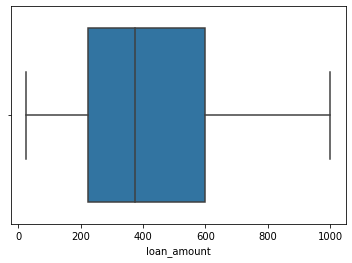

In [18]:
sns.boxplot(x=df[(df["loan_amount"] >= 25) & (df["loan_amount"] <= 1000)].loan_amount)
plt.show()

In [19]:
top_countries_count = df.groupby("country").loan_amount.count().sort_values(ascending=False).head(12).index.tolist()
print(top_countries_count)

['Philippines', 'Kenya', 'El Salvador', 'Cambodia', 'Pakistan', 'Colombia', 'Uganda', 'Tajikistan', 'Peru', 'Nigeria', 'India', 'Nicaragua']


In [20]:
top_countries_sum = df.groupby("country").loan_amount.sum().sort_values(ascending=False).head(12).index.tolist()
print(top_countries_sum)

['Philippines', 'Kenya', 'El Salvador', 'Pakistan', 'Cambodia', 'Colombia', 'Tajikistan', 'Peru', 'Uganda', 'Ecuador', 'Nicaragua', 'Vietnam']


In [21]:
top_countries_mean = df.groupby("country").loan_amount.mean().sort_values(ascending=False).head(12).index.tolist()
print(top_countries_mean)

['Iraq', 'Burundi', 'Dominican Republic', 'Palestine', 'United States', 'Timor-Leste', 'Myanmar (Burma)', 'Moldova', 'Azerbaijan', 'China', 'Albania', 'Saint Vincent and the Grenadines']


<AxesSubplot:xlabel='country', ylabel='loan_amount'>

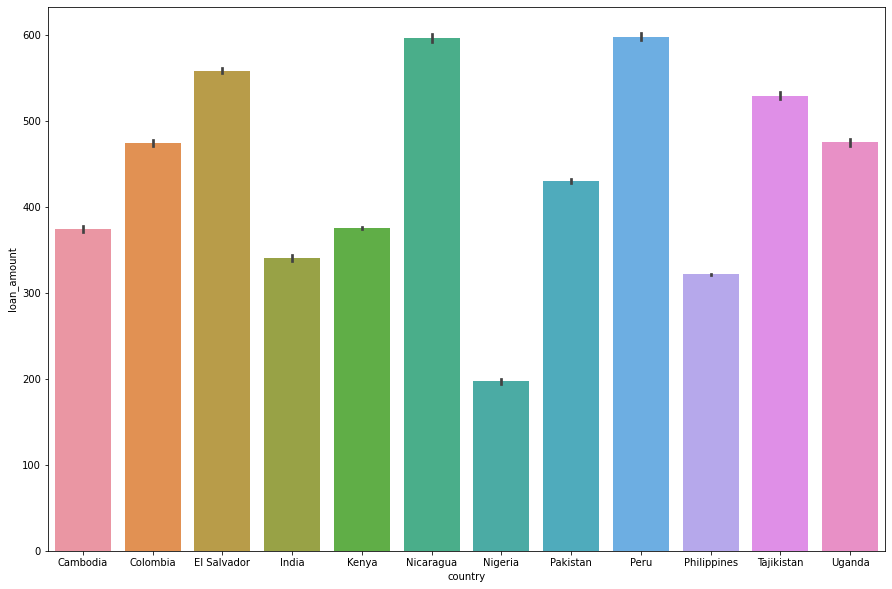

In [22]:
# Creates the figure, note: you're only using this syntax so that you can modify the y-axis ticks later
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df[df["country"].isin(top_countries_count)].sort_values(by="country"), x="country", y="loan_amount")

<AxesSubplot:xlabel='country', ylabel='loan_amount'>

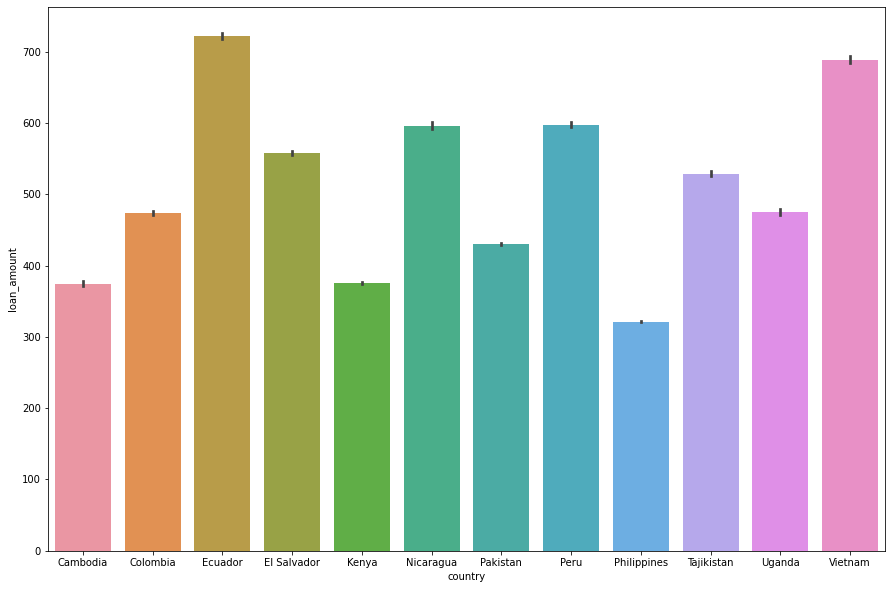

In [23]:
f, ax2 = plt.subplots(figsize=(15, 10))
sns.barplot(data=df[df["country"].isin(top_countries_sum)].sort_values(by="country"), x="country", y="loan_amount")

<AxesSubplot:xlabel='loan_amount', ylabel='country'>

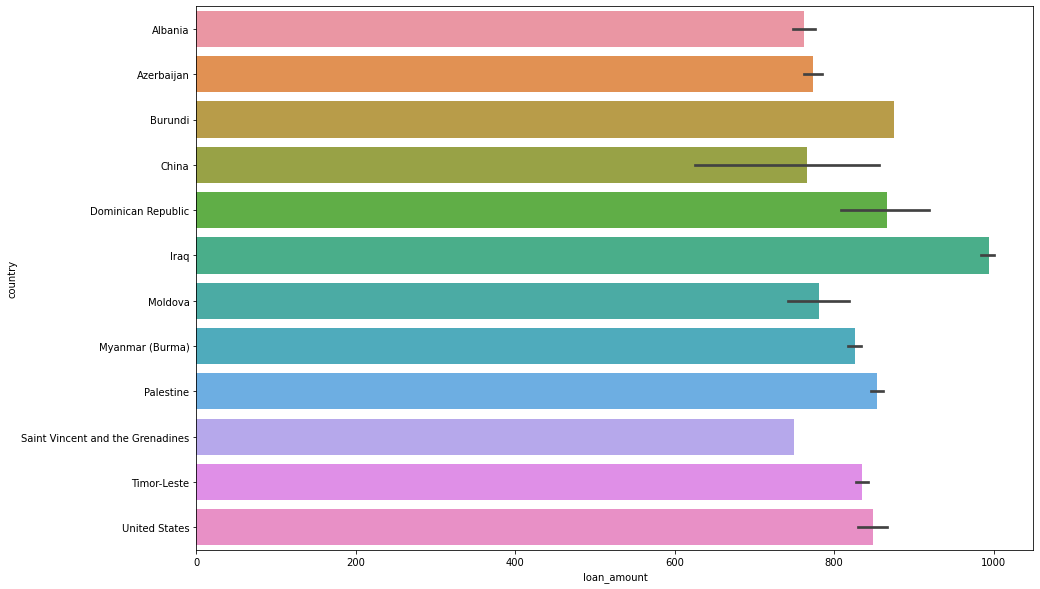

In [24]:
f, ax2 = plt.subplots(figsize=(15, 10))
sns.barplot(data=df[df["country"].isin(top_countries_mean)].sort_values(by="country"), y="country", x="loan_amount")

### Adding `$` units

You can use the following code to so that the `loan_amount` ticks on the y-axis begin with a `$` (units of USD). 

```python
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
```

Run the code in the cell below to see the `$` in action.

In [25]:
print(df.head())
print(df.groupby("country").loan_amount.mean().sort_values(ascending=False).index)

   loan_amount          sector   country  gender
0        300.0            Food  Pakistan  female
1        575.0  Transportation  Pakistan  female
2        150.0  Transportation     India  female
3        200.0            Arts  Pakistan  female
4        400.0            Food  Pakistan  female
Index(['Iraq', 'Burundi', 'Dominican Republic', 'Palestine', 'United States',
       'Timor-Leste', 'Myanmar (Burma)', 'Moldova', 'Azerbaijan', 'China',
       'Albania', 'Saint Vincent and the Grenadines', 'Brazil', 'Suriname',
       'Costa Rica', 'Lebanon', 'Lesotho', 'Ecuador', 'Solomon Islands',
       'Mongolia', 'Thailand', 'Puerto Rico', 'Jordan', 'Kosovo', 'Armenia',
       'Vietnam', 'Ukraine', 'Bolivia', 'Kyrgyzstan', 'Georgia',
       'Burkina Faso', 'South Africa', 'Guatemala', 'Yemen', 'Zimbabwe',
       'Peru', 'Nicaragua', 'Somalia', 'Paraguay', 'Zambia', 'Samoa',
       'Honduras', 'Belize', 'El Salvador', 'Benin',
       'The Democratic Republic of the Congo', 'Tanzania', 'Mali',

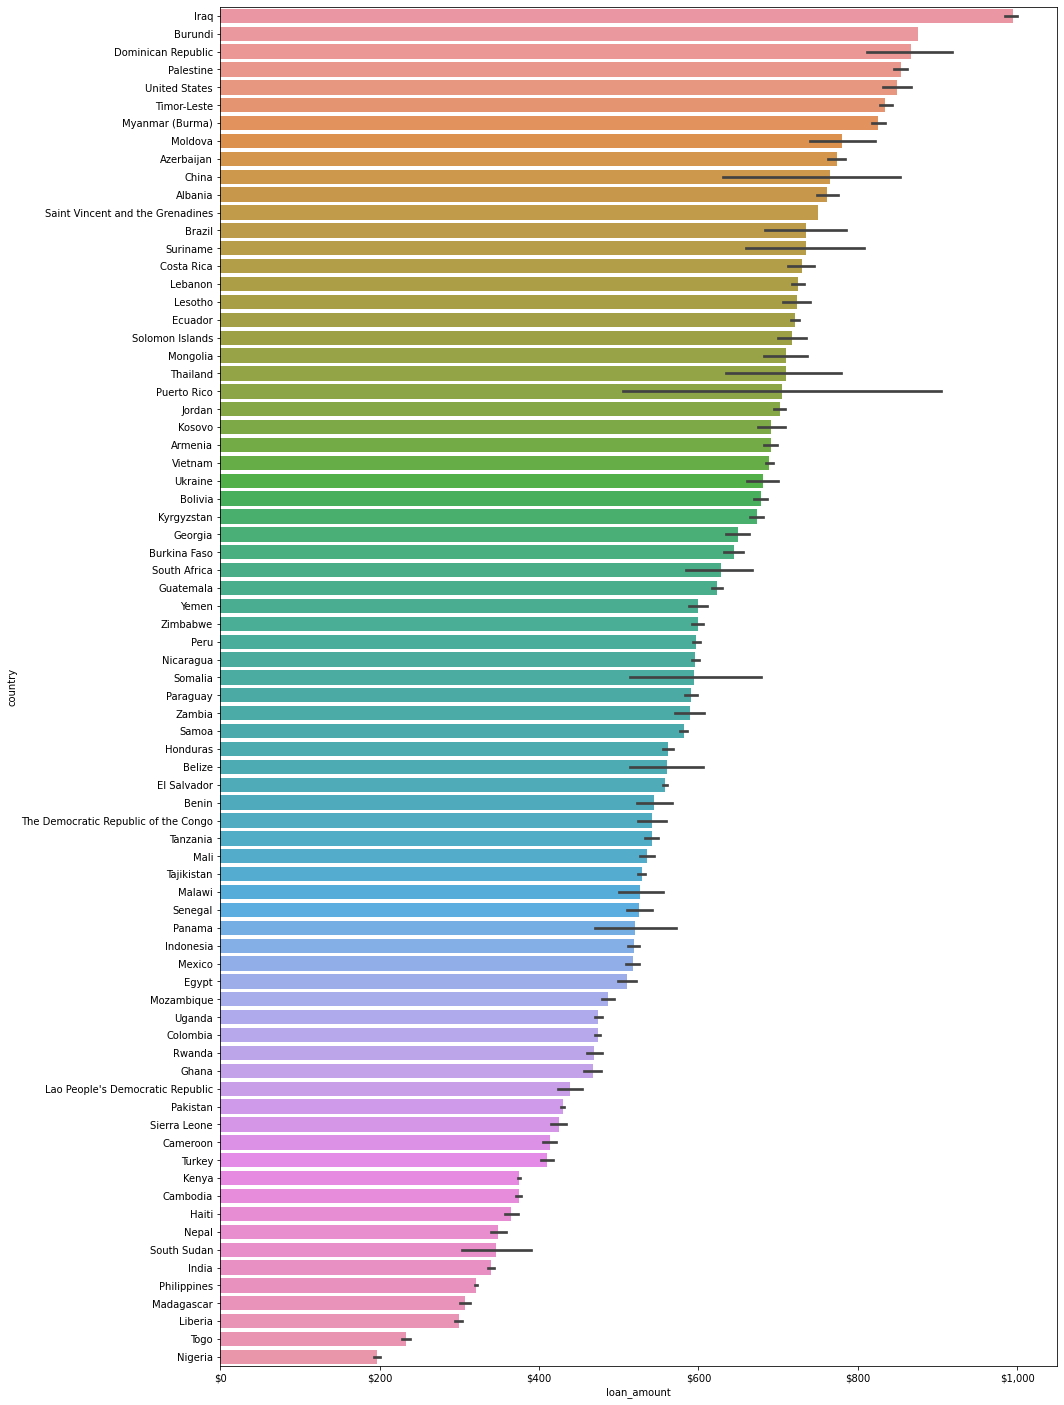

In [26]:
import matplotlib.ticker as mtick

# Creates the figure
f, ax = plt.subplots(figsize=(15, 25))

# Plot the data
sns.barplot(data=df,
            y="country",
            x="loan_amount",
            order=df.groupby("country").loan_amount.mean().sort_values(ascending=False).index)

# Use part of the code above to format the y-axis ticks below this line
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

## Step 5: Learn More By Using `hue` In Your Visualization

You can visualize even more data on one bar plot by visualizing the loan amount by country, and "nesting" by gender. Add the `hue` parameter to your `sns.barplot()` and set it so that the visualization includes the nested category of gender.
<br>
<br>
<details>
<summary>Hint</summary>
<br>
Set `hue` equal to the column name `gender`.
<br>
</details>

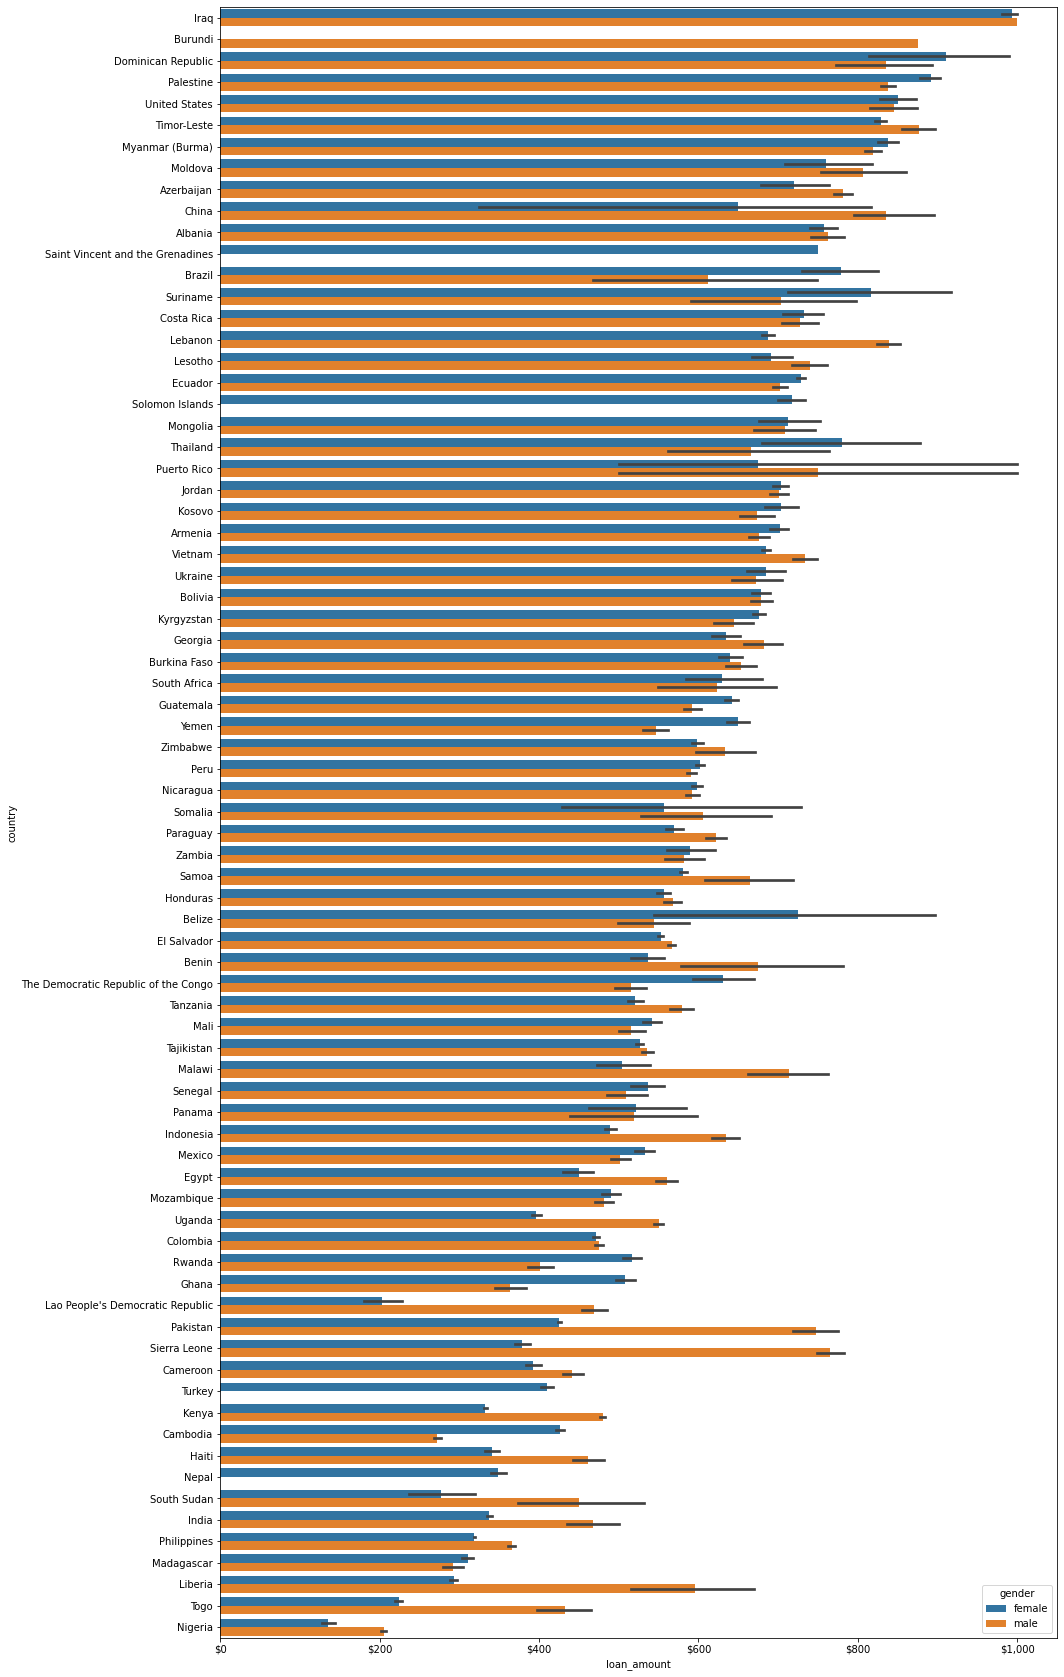

In [27]:
# Creates the figure, you're only using this syntax so you can modify the y-axis ticks below
f, ax = plt.subplots(figsize=(15, 30))

sns.barplot(data=df, y="country",
            x="loan_amount",
            hue="gender",
            order=df.groupby("country").loan_amount.mean().sort_values(ascending=False).index)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

#### Reflection Questions

On average, do female or male recipients receive larger loans from Kiva?

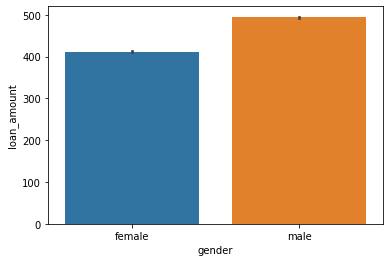

In [28]:
sns.barplot(data=df,
            x="gender",
            y="loan_amount")
plt.show()

Which country has the *least* disparity in loan amounts awarded by gender?

In [29]:
print(df.head())
gender_loans = df.groupby(["country", "gender"]).loan_amount.mean().reset_index()
print(gender_loans.head())

   loan_amount          sector   country  gender
0        300.0            Food  Pakistan  female
1        575.0  Transportation  Pakistan  female
2        150.0  Transportation     India  female
3        200.0            Arts  Pakistan  female
4        400.0            Food  Pakistan  female
      country  gender  loan_amount
0     Albania  female   757.366589
1     Albania    male   763.165266
2     Armenia  female   701.904762
3     Armenia    male   675.599583
4  Azerbaijan  female   720.089286


In [30]:
gender_loans_pivoted = gender_loans.pivot(index = "country",
                                            columns="gender",
                                            values="loan_amount").fillna(0).reset_index()
gender_loans_pivoted.columns.name = None
gender_loans_pivoted["difference"] = gender_loans_pivoted["male"] - gender_loans_pivoted["female"]
gender_loans_pivoted = gender_loans_pivoted.sort_values(by="difference", ascending=True)
print(gender_loans_pivoted.head(10))

                                 country      female        male  difference
53      Saint Vincent and the Grenadines  750.000000    0.000000 -750.000000
57                       Solomon Islands  717.394180    0.000000 -717.394180
68                                Turkey  410.182460    0.000000 -410.182460
42                                 Nepal  349.219858    0.000000 -349.219858
3                                 Belize  725.000000  544.805195 -180.194805
6                                 Brazil  778.977273  612.500000 -166.477273
9                               Cambodia  426.172724  272.706656 -153.466069
19                                 Ghana  508.453437  364.175603 -144.277834
65  The Democratic Republic of the Congo  631.398810  515.167549 -116.231261
52                                Rwanda  516.818478  401.964453 -114.854025


In [31]:
print(gender_loans_pivoted[gender_loans_pivoted.country == "Burundi"])

   country  female   male  difference
8  Burundi     0.0  875.0       875.0


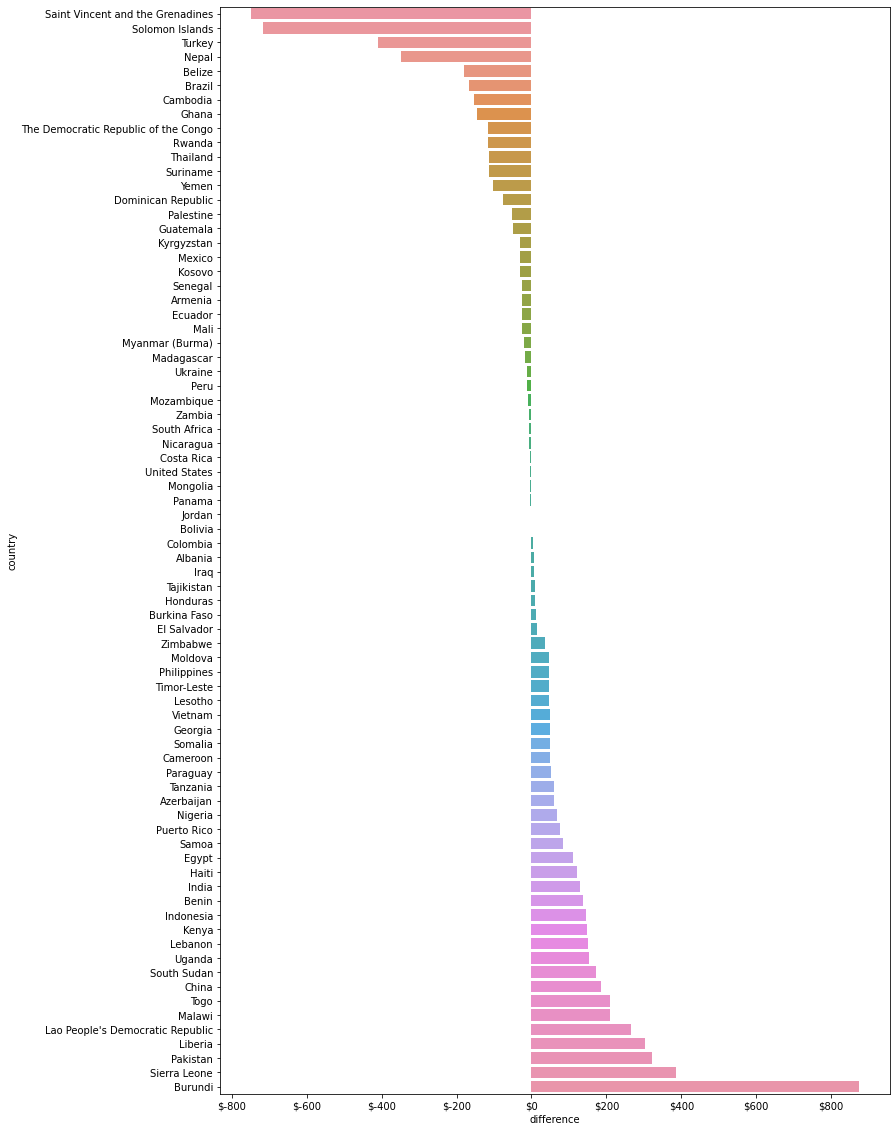

In [32]:
f, ax = plt.subplots(figsize=(12, 20))
sns.barplot(data=gender_loans_pivoted,
           y="country",
           x="difference")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.show()

## Step 6: Styling


Set a different color palette using `sns.set_palette()`. You can use any of the Color Brewer qualitative color palettes:

- Set1
- Set2
- Set3
- Pastel1
- Pastel2
- Dark2
- Accent

You can read more about <a href = "https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes" target = "_blank">qualitative color palettes in the Seaborn documentation.</a>


Set the plot background style using `sns.set_style()`. You can experiment with:
- whitegrid
- darkgrid
- white
- dark

Set the title using `ax.set_title("")`.


In [33]:
print(df.groupby("country").loan_amount.sum().sort_values(ascending=False).head(10))

country
Philippines    50082875.0
Kenya          26789675.0
El Salvador    19142475.0
Pakistan       11007300.0
Cambodia       10914075.0
Colombia        8552925.0
Tajikistan      7977450.0
Peru            7727600.0
Uganda          7447600.0
Ecuador         5570825.0
Name: loan_amount, dtype: float64


In [34]:
print()
x = range(0, 300000001, 50000000)
for n in x:
    print(n)
print()


0
50000000
100000000
150000000
200000000
250000000
300000000



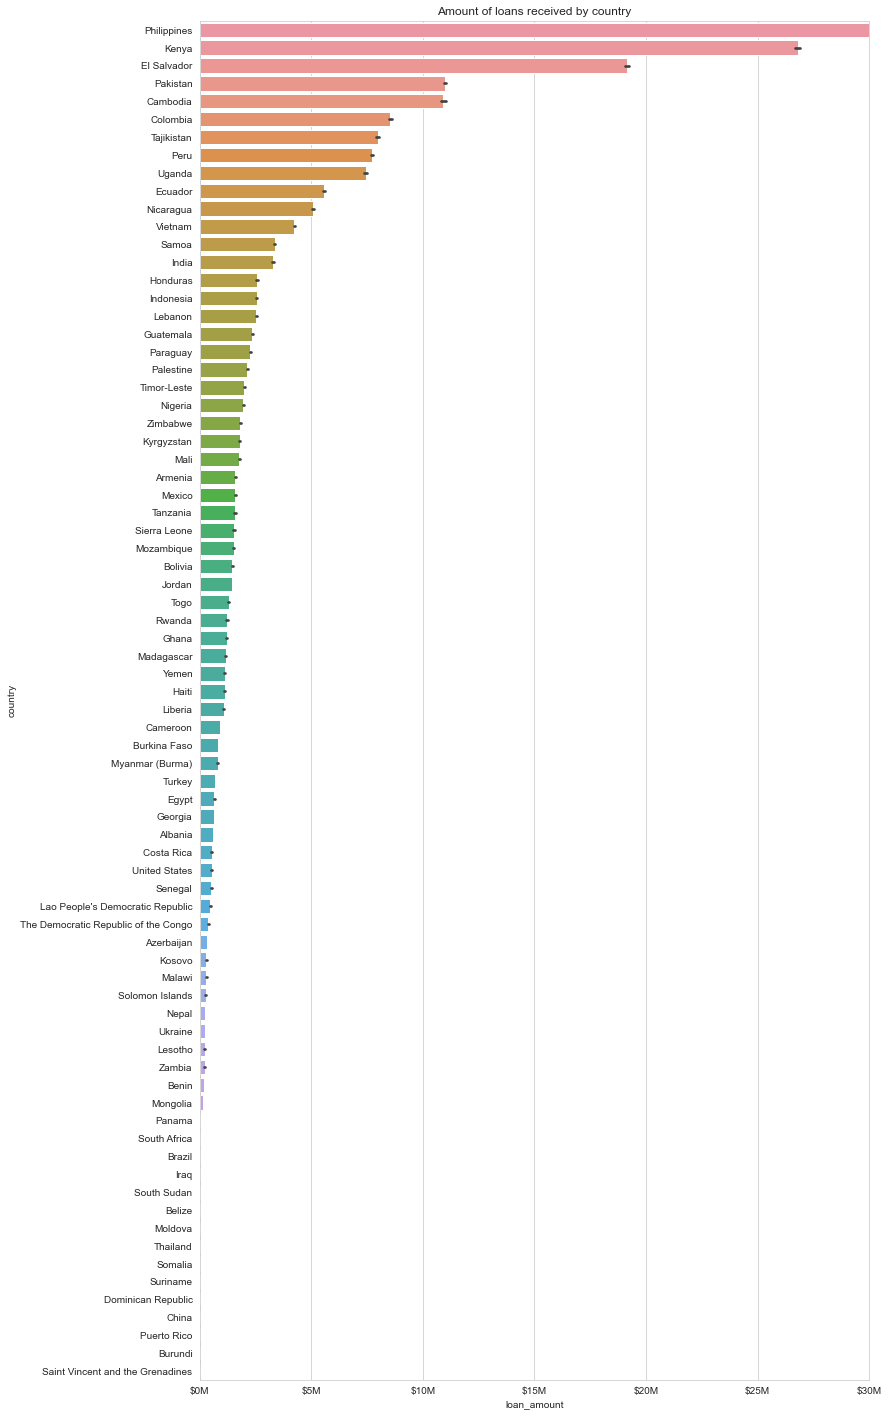

In [35]:
# Set color palette
sns.set_palette("Dark2")
# Set style
sns.set_style("whitegrid")

# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
f, ax = plt.subplots(figsize=(12, 25))

# Add a title
plt.title("Amount of loans received by country")

# Use Seaborn to create the bar plot
plt.xlim([0, 30000000])
sns.barplot(data=df,
            y="country",
            x="loan_amount",
            estimator=sum,
            order=df.groupby("country").loan_amount.sum().sort_values(ascending=False).index)

def funct(x, pos):
    return f"${int(x / 1000000)}M"

tick = mtick.FuncFormatter(funct)
ax.xaxis.set_major_formatter(tick)

## Step 7: Box Plots With Kiva Data

So far you have visualized the average size of loans by country using bar charts; now you are going to make a box plot to compare the distribution of loans by country.

We have set up a figure for you to plot on. Use `sns.boxplot()` to compare the distribution of loan amounts by country for the Kiva dataset.   

`sns.boxplot()` can be passed the same parameters as `sns.barplot()`.

**Optional:** You may set a new color palette if you would like to continue using `sns.set_palette()`.


<AxesSubplot:xlabel='loan_amount', ylabel='country'>

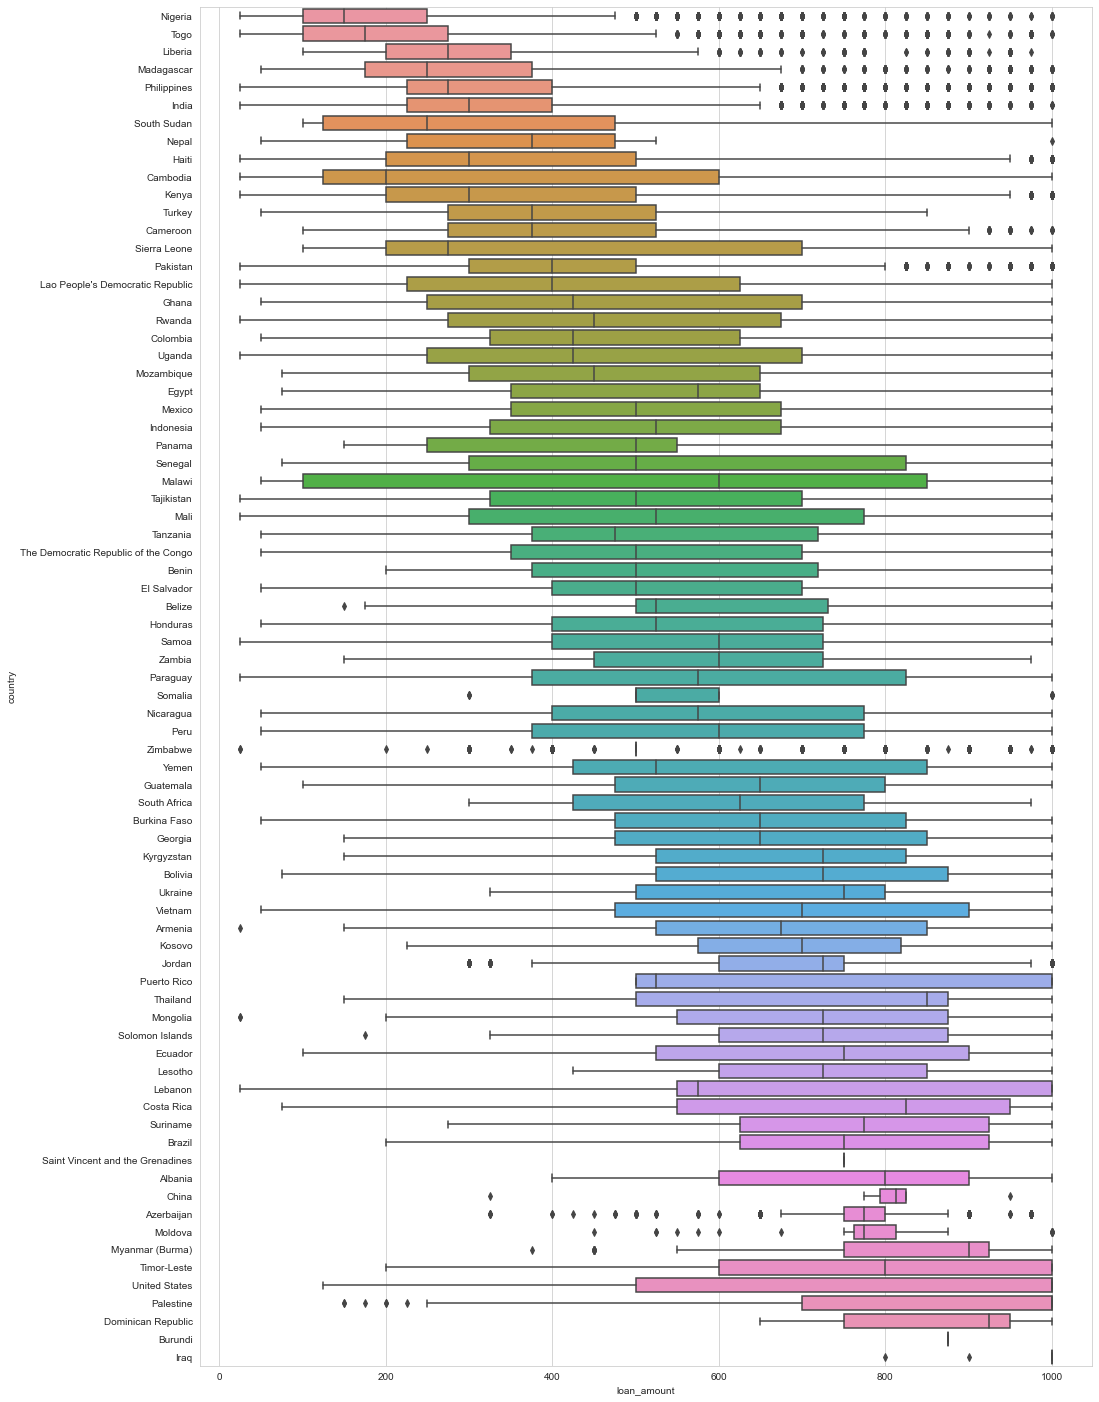

In [36]:
plt.figure(figsize=(16, 25))
sns.boxplot(x="loan_amount",
            y="country",
            data=df,
            order=df.groupby("country").loan_amount.mean().sort_values().index)

## Step 8: Box Plot by Activity

Instead of visualizing the loan amount by *country*, use `sns.boxplot()` to plot the loan amount by *activity*.
<br>
<br>
<details>
<summary>Hint</summary>
<br>
You can use the same code as the box plot above, but the `x` parameter should be set to `"activity"`.
<br>
</details>
 
**Optional:** Set a different plot style and color palette to best visualize this data.

<AxesSubplot:xlabel='sector', ylabel='loan_amount'>

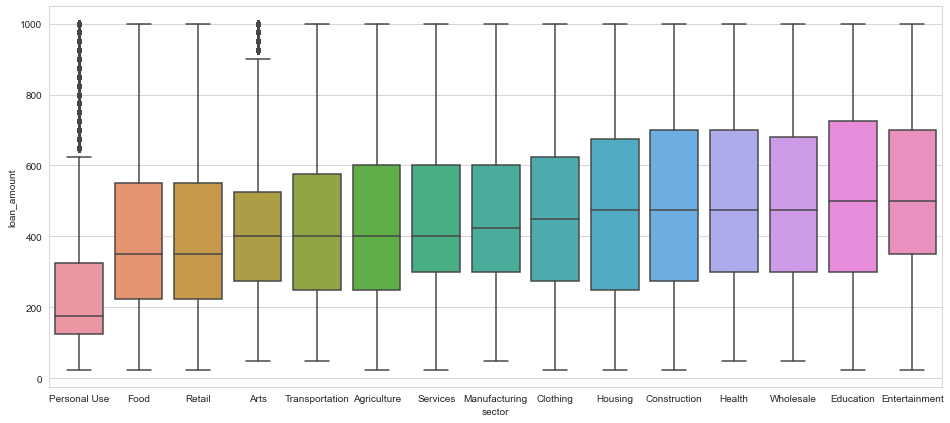

In [37]:
plt.figure(figsize=(16, 7))
sns.boxplot(y="loan_amount",
            x="sector",
            data=df,
            order=df.groupby("sector").loan_amount.mean().sort_values().index)

## Step 9: Violin Plots

You can use nearly identical syntax (as you have used for box plots) to create violin plots. Take this line of code from above:

```python
sns.boxplot(data=df, x="activity", y="loan_amount")
```

To visualize the distribution of the exact same data as a violin plot you could pass the same parameters to `sns.violinplot()` instead of `sns.boxplot()`.

Change the code in the cell below so that the data is plotted as a violin plot instead of a barplot.

<AxesSubplot:xlabel='sector', ylabel='loan_amount'>

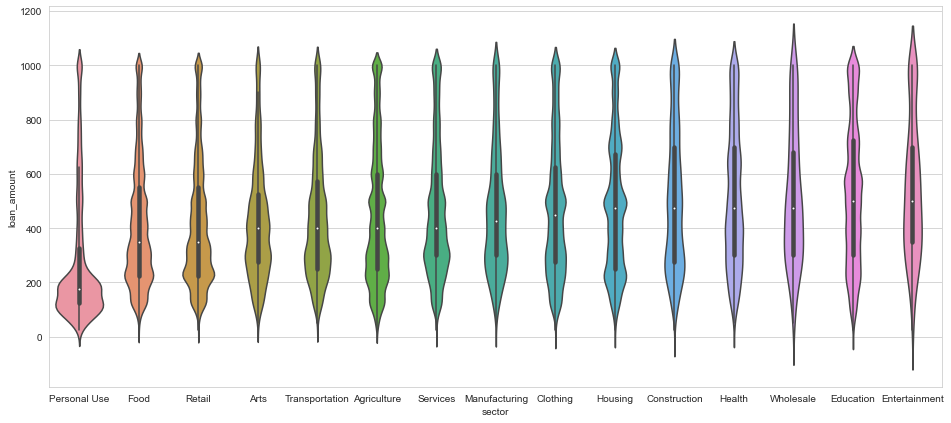

In [38]:
plt.figure(figsize=(16, 7))
sns.violinplot(y="loan_amount",
            x="sector",
            data=df,
            order=df.groupby("sector").loan_amount.mean().sort_values().index)

### Create a violin plot that visualizes the distribution of loan amount by country.
Previously, you created a violin plot and plotted the data by _activity_. This time, create a violin plot that plots the data by _country_.

<br>
<details>
<summary>Hint</summary>
<br>
Change the value of the `x` argument passed into the `violinplot()` function.
<br>
</details>

<AxesSubplot:xlabel='loan_amount', ylabel='country'>

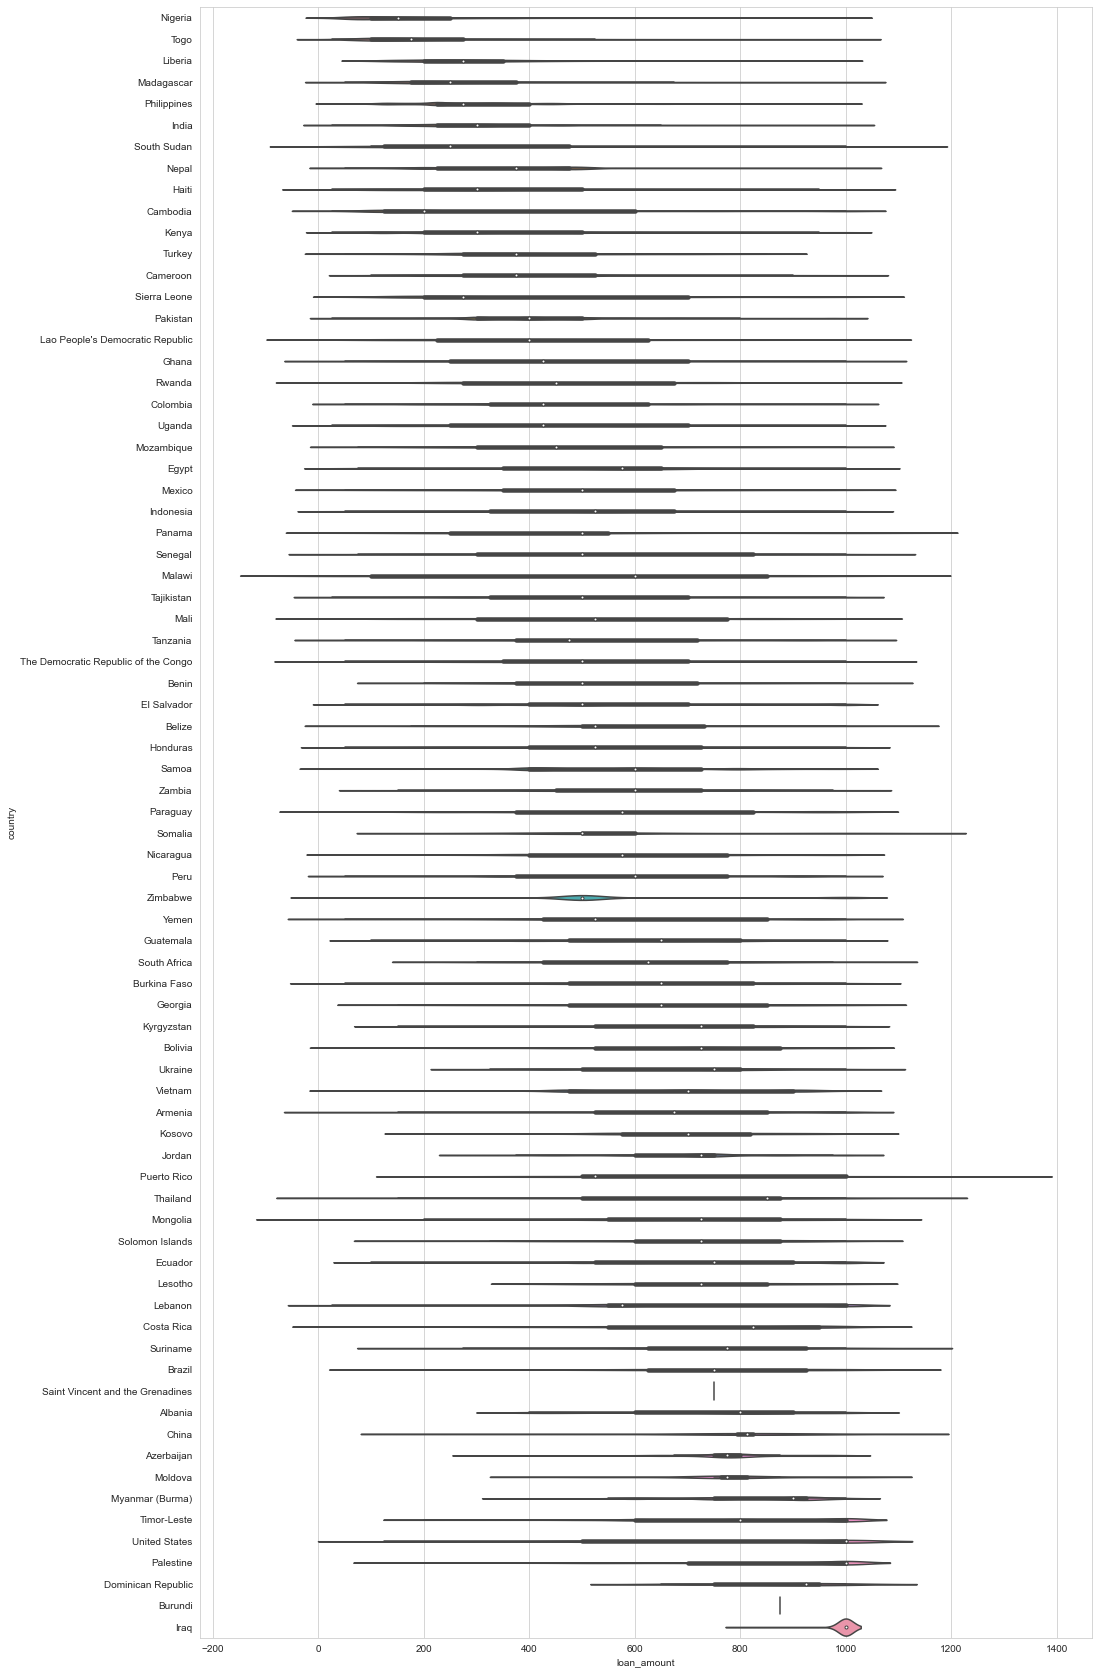

In [39]:
plt.figure(figsize=(16, 30))
sns.violinplot(x="loan_amount",
                y="country",
                data=df,
                order=df.groupby("country").loan_amount.mean().sort_values().index)

## Step 10: Split Violin Plots

Use the `hue` and `split` parameters with `sns.violinplot()` to visualize the distribution of loan amount by country, split by gender. 

<br>
<details>
<summary>Hint</summary>
<br>
The argument `hue` should be set to `"gender"` and `split` should equal `True`. 
<br>
</details>

<AxesSubplot:xlabel='sector', ylabel='loan_amount'>

<Figure size 1296x864 with 0 Axes>

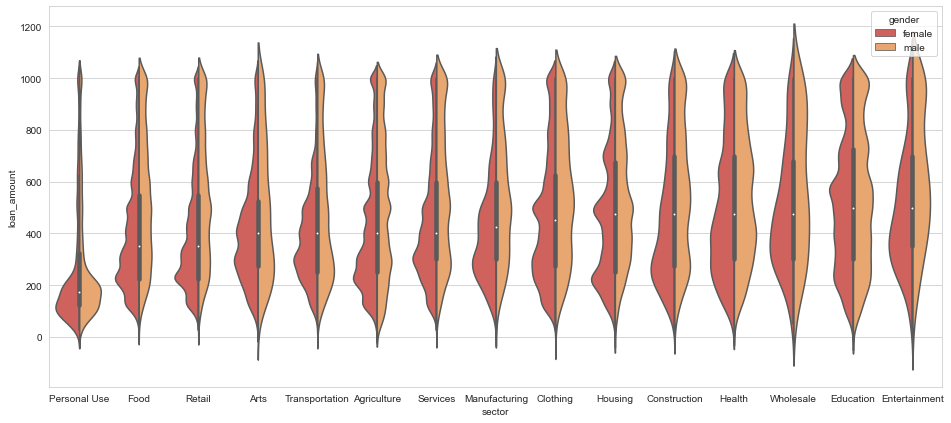

In [40]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")
plt.figure(figsize=(18, 12))
plt.figure(figsize=(16, 7))
sns.violinplot(y="loan_amount",
            x="sector",
            hue="gender",
            split=True,
            data=df,
            order=df.groupby("sector").loan_amount.mean().sort_values().index)